## Determination of Toxic Comments 
**Md Shahidullah Kawsar**

The primary goal of this project is to design a supervised learning model that can perform binary classification in order to determine toxic and non-toxic comments from a social network.

Online conversations can be toxic and subjected to threats, abuse, or harassment. Online conversation toxicity can be defined as rude, disrespectful, make somebody leave a discussion, stop expressing oneself, and even give up on looking for dfferent opinions. To help improving online onversation and analyze the negative online ehaviors, the goal of this project is to build a supervised machine learning model that can perform binary classification, determine toxic and non-toxic comments.

The dataset is collected by the Conversation AI team, a research initiative founded by Jigsaw and Google organized a Kaggle competition in 2019: Jigsaw Unintended Bias in Toxicity Classification. The dataset was collected from Civil Comments platform from 2015 to 2017.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# Read only the comments and the target variable
df = pd.read_csv('train.csv', usecols = ['comment_text', 'target'])

display(df.head())
print(df.shape)

,target,comment_text
0,0.000000,"This is so cool. It's like, 'would you want yo..."
1,0.000000,Thank you!! This would make my life a lot less...
2,0.000000,This is such an urgent design problem; kudos t...
3,0.000000,Is this something I'll be able to install on m...
4,0.893617,haha you guys are a bunch of losers.


(1804874, 2)


The dataset contains 1.8 million observations and 1 feature. The “comment_text” column contains the comment from diverse range of conversations and “target” column indicates how toxic a comment is.

**Comment:** “haha you guys are a bunch of losers.”
<br>**Target Label (Toxicity):** 0.89

**Comment:** “The woman is basically a slave.”
<br>**Target Label (Toxicity):** 0.83

**Comment:** “I love the idea of upvoting entire articles.”
<br>**Target Label (Toxicity):** 0.0

Target variable < 0.5 belongs to non-toxic and target variable ≥ 0.5 belongs to toxic comments.

In [3]:
df['target'] = np.where(df['target'] >= 0.5, 1, 0)

In [4]:
df['target'].value_counts(normalize=True)

0    0.920031
1    0.079969
Name: target, dtype: float64

The dataset is highly imbalanced. Only 8% comments and toxic and 92% comments are non-toxic

**TFIDF Vectorizer:** TFIDF is Term Frequency and Inverse Document Frequency. Term frequency summarizes how often a given word appears within a document. Inverse document frequency downscales words that appear a lot across documents.

In [5]:
Tfidf_Vectorizer = TfidfVectorizer()
X = Tfidf_Vectorizer.fit_transform(df["comment_text"])
y = df['target']

print(X.shape, y.shape)

(1804874, 318304) (1804874,)


**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable can be a binary variable that contains data coded as 1 (yes, toxic, etc.) or 0 (no, non-toxic, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

**Assumptions**: 
- The dependent variable must be categorical
- The independent variables(features) must be independent (to avoid multicollinearity).

In this dataset we need to classify whether a comment is toxic (1) or not (0). If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is toxic, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as non-toxic which can lead to serious consequence in real time. From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.
The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

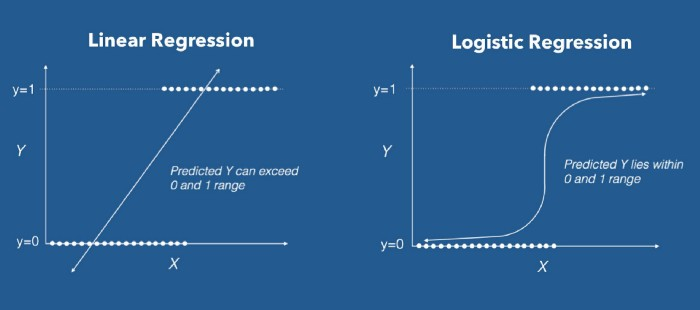

After applying the sigmoid function to the output of the linear regression, The hypothesis for logistic regression is 

Here, x is the input features and theta is the weights.

where the sigmoid function is represented by, 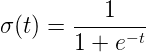

The hypothesis for logistic regression then becomes, 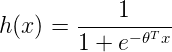

To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes. If predicted_value ≥ 0.5, then classify comment as toxic, else as non-toxic. Decision boundary can be linear or non-linear. 

**Cost Function**
<br>Like Linear Regression, we will define a cost function for our model and the objective will be to minimize the cost.
The cost function for a single training example can be given by: 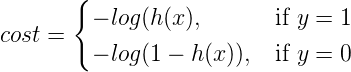

If the actual class is 1 and the model predicts 0, we should highly penalize it and vice-versa. As you can see from the below picture, for the plot -log(h(x)) as h(x) approaches 1, the cost is 0 and as h(x) nears 0, the cost is high (that is we penalize the model heavily). Similarly for the plot -log(1-h(x)) when the actual value is 0 and the model predicts 0, the cost is 0 and the cost becomes high as h(x) approaches 1.

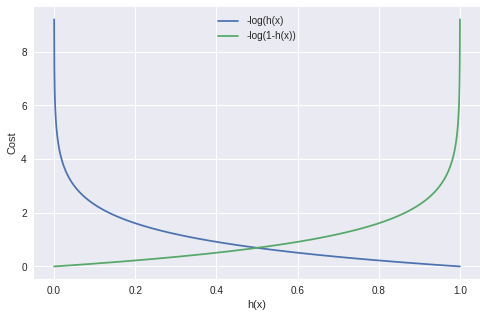

[1] Christopher M. Bishop, “Pattern Recognition and Machine Learning,” Springer, 2006
<br>[2] Logistic Regression — Detailed Overview: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
<br>[3] Introduction to Logistic Regression: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148
<br>[4] Building a Logistic Regression in Python: https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
LR = LogisticRegression(C=5, random_state=42, solver='sag', max_iter=100, n_jobs=-1)
LR.fit(X_train, y_train)

LogisticRegression(C=5, n_jobs=-1, random_state=42, solver='sag')

I used the solver Stochastic Average Gradient (SAG) method for logistic regression which optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the iteration cost of the SAG method is independent of the
number of terms in the sum. However, by incorporating a memory of previous gradient values the SAG method achieves a faster convergence rate than black-box SG methods. It is faster than other solvers for large datasets, when both the number of samples and the number of features is large

## Based on the traning coeffcients of the Tf-IDF features and the intercept, how can we find the probability of the first comment being toxic in the test set from the logistic regression?

In [7]:
# by formula
logit_probability = 1/(1+np.exp(-(LR.coef_[0]*X_test[0].transpose() + LR.intercept_[0])))
print(logit_probability)

[0.00420394]


In [8]:
# by using scikit-learn function
LR.predict_proba(X_test)[:,1][0]

0.004203940961138181

From both ways, the probability is same. The first test comment belongs to non-toxic comment.

In [9]:
# cross-validation
cv_auc = cross_val_score(LR, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
print(cv_auc)
print(cv_auc.mean())

[0.94607756 0.94436349 0.94531875 0.94375522 0.94326619]
0.9445562410978386


In [10]:
# prediction on the test set
y_pred = LR.predict(X_test)

In [11]:
# auc of the test set
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.7420798652354988


The test set auc score is much lower than the cross-validation auc

In [12]:
# confusion matrix
# As the dataset is highly imbalanced, we need to focus on the precision and recall
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[491526   6637]
 [ 21759  21541]]


True Positive = 491526   
True Negative = 21541
<br>False Positive = 6637
<br>False Negative = 21759  

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    498163
           1       0.76      0.50      0.60     43300

    accuracy                           0.95    541463
   macro avg       0.86      0.74      0.79    541463
weighted avg       0.94      0.95      0.94    541463



For the minority class (toxic comments), the recall is very low (0.5) and require further improvement of the model

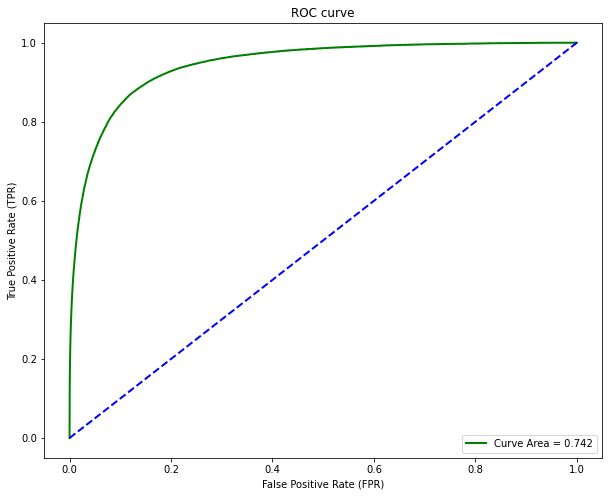

In [14]:
fpr, tpr, thr = roc_curve(y_test, LR.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

The above analysis reprsents a simple example of logistic regression and supervised binary classification problem.